---------------
# Example Usage
---------------

## Import your model (or use your own) 

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import torchvision
model = torchvision.models.resnet50(pretrained=True)


## Import MapExtrakt

In [2]:
from MapExtrackt import FeatureExtractor


## Load Model

In [3]:
fe = FeatureExtractor(model)

In [4]:
fe.name

'ResNet'

## Load image into the FeatureExtractor

##### (Can accept multiple types of image)

### > PIL Image

In [5]:
from PIL import Image

dark_img_path = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Extant_Leaves/Annonaceae/Annonaceae_Anaxagorea_acuminata_Wing_Wing_132-001.jpg"


# img = Image.open(dark_img_path, mode="RGB")
# fe.set_image(img)

### > Numpy array

In [14]:
dir(torchvision.transforms.functional)

['Any',
 'F_pil',
 'F_t',
 'Image',
 'List',
 'Optional',
 'Tensor',
 'Tuple',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_get_image_num_channels',
 '_get_image_size',
 '_get_inverse_affine_matrix',
 '_get_perspective_coeffs',
 '_is_numpy',
 '_is_numpy_image',
 '_is_pil_image',
 '_parse_fill',
 'accimage',
 'adjust_brightness',
 'adjust_contrast',
 'adjust_gamma',
 'adjust_hue',
 'adjust_saturation',
 'affine',
 'center_crop',
 'convert_image_dtype',
 'crop',
 'erase',
 'five_crop',
 'gaussian_blur',
 'hflip',
 'math',
 'normalize',
 'np',
 'numbers',
 'pad',
 'perspective',
 'pil_to_tensor',
 'resize',
 'resized_crop',
 'rgb_to_grayscale',
 'rotate',
 'scale',
 'ten_crop',
 'to_grayscale',
 'to_pil_image',
 'to_tensor',
 'torch',
 'vflip',
 'warnings']

In [7]:
import torch

In [9]:
import numpy as np
import cv2
img = cv2.imread(dark_img_path)

img = torchvision.transforms.RandomResizedCrop(224)(torch.from_numpy(img).permute(2,0,1)).permute(1,2,0).numpy()
# torch.from_numpy()
# img.shape
fe.set_image(img)

### > File Name

In [ ]:
fe.set_image("pug.jpg")

## From here we can check some information on the model, total layers, layer types, total cells (channels over all layers), cells per layers (channels over specific layer)

In [10]:
print(fe)

<BASE MODEL: ResNet>
---------------------------
----- Class  settings -----
---------------------------
Layers: 180
Total Cells: 98508
Image: (224, 224)
Device: cuda
---------------------------
-- Image output settings --
---------------------------
Output Size: (800, 600)
Out Type: pil
Border Size: 3.0%
Picture in picture: True
Colourize Style: 20
Write Text: full


In [11]:
fe.layers

180

In [12]:
fe.layer_names

['Conv2d',
 'BatchNorm2d',
 'ReLU',
 'MaxPool2d',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'Conv2d',
 'BatchNorm2d',
 'Sequential (Block)',
 'ReLU',
 'Bottleneck (Block)',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Bottleneck (Block)',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Bottleneck (Block)',
 'Sequential (Block)',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'Conv2d',
 'BatchNorm2d',
 'Sequential (Block)',
 'ReLU',
 'Bottleneck (Block)',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Bottleneck (Block)',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Bottleneck (Block)',
 'Conv2d',
 'BatchNorm2d',
 'ReLU',
 'Con

* If you wanted to extract just the Convolution layers add the parameter allowed_modules=["conv"] when you set_image.

* If you wanted to extract just the ReLU layers add the parameter allowed_modules=["relu"] when you set_image. 

* If you wanted to extract just the Normalization layers add the parameter allowed_modules=["norm"] when you set_image.

* If your model is constructed on BLOCKS you can use allowed_modules=["block_name"] to extract only the block outputs.

* You can use multiple terms i.e allowed_modules=["conv","pool"]

* If you want to specify the recursion depth you can with allowed_depth = n   - this will only go n deep into nested sequential blocks.

*i.e examine the below for example.*

- An allowed_depth of 0 would only include the outer most laters (conv1,bn1,relu,maxpool,later1 etc) 
- An allowed_depth of 1 would include the above + the "bottleneck"

and so on

`ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )`


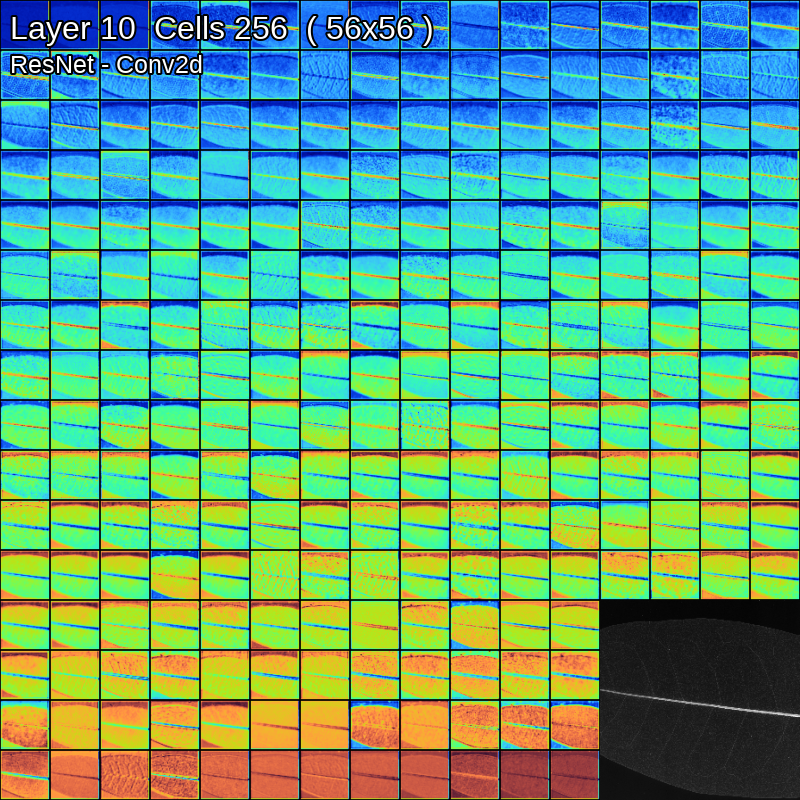

In [13]:
fe.display_from_map(layer_no=10,outsize=(800,800))

In [ ]:
fe.get_total_cells()

In [ ]:
fe.get_cells(layer_no=3)

-----------------
# Viewing Layers
-----------------

### You can view layers as a whole, displaying each inner cell (channel) together.


## To get the second layer (i.e Conv2D)

In [ ]:
img = fe.display_from_map(layer_no=1,outsize=(800,800))
img

## Save the image

In [ ]:
img.save("example.jpg")

## Or to get the 9th layer 

In [ ]:
fe.display_from_map(layer_no=8)

### outputs by default are set to 1080 resolution. This can be changed. NOTE setting outsize to 'False' results in the layer displaying each cell as their actual size.

In [ ]:
fe.display_from_map(layer_no=10, outsize=False)



### Or you can set a custom output size - the cells attempt to fit the best they can to the 'outsize' ratio

In [ ]:
fe.display_from_map(layer_no=8, outsize=(900,300))

In [ ]:
fe.display_from_map(layer_no=8, outsize=(500,900))

### You can turn off the picture in picture 

In [ ]:
fe.display_from_map(layer_no=8, outsize=(1200,600),picture_in_picture=False)

### Or turn off the text 

In [ ]:
fe.display_from_map(layer_no=12, outsize=(1200,600),write_text="none")

## Colourization of the cells colour can be changed.

In [ ]:
fe.display_from_map(layer_no=3, outsize=(700,600), colourize=18)

In [ ]:
fe.display_from_map(layer_no=6, colourize=2)

## Colourize 0 is grey scale as nature intended it

In [ ]:
fe.display_from_map(layer_no=8, colourize=0)

## The border size around cells can be changed. The value is a % of the cells total width.

In [ ]:
fe.display_from_map(layer_no=1, border=0.2, colourize=20)

In [ ]:
fe.display_from_map(layer_no=1, border=0.1)

-----------------
# Viewing Individual Cells
-----------------

### You can view individual cells in a similar fasion. You only need to pass the cells number you want from each layer.



In [ ]:
fe.display_from_map(layer_no=1,cell_no=1,border=0.03,write_text="full",outsize=(300,200))


## Setting outsize to "False" displays cell at actual size

In [ ]:
fe.display_from_map(layer_no=6,cell_no=6,outsize=False)

In [ ]:
fe.display_from_map(layer_no=10,cell_no=6,outsize=False)

In [ ]:
fe.display_from_map(layer_no=18,cell_no=6,outsize=False)

In [ ]:
fe.display_from_map(layer_no=4,cell_no=3,outsize=(400,400))

## Stacking cells is possible like so. 

In [ ]:
img_stack = np.array([])
for i,x in enumerate(range(5)):
    img = fe.display_from_map(layer_no=1,cell_no=x,outsize=(300,300), picture_in_picture=False, write_text="full")
    if i == 0:
        img_stack = img
    else:
        img_stack = np.hstack((img,img_stack))
        
img = Image.fromarray(img_stack)
img.save("Example_stack.jpg")
img

## Or saving a range of cells to file

In [ ]:
idx_from = 0
idx_to = 20

_ = [fe.display_from_map(layer_no=9,cell_no=x).save(f"./pug_cells/file{x}.jpg") for x in range(idx_from,idx_to)]

-----------------------
# Changing settings (without generating output)
-----------------------
## Settings are saved each time an output is generated and stored for the next output
### This can be changed at any time by generating a new output or using the following. Any or all of the parameters can be used.

In [ ]:
fe.set_output(out_type="np")
fe.display_from_map(layer_no=1)

In [ ]:
fe.set_output(outsize=(100,100),out_type="pil")
fe.display_from_map(layer_no=1)

In [ ]:
fe.set_output(outsize=(500,100))
fe.display_from_map(layer_no=1)

-----------------
# Slicing
-----------------

## You can slice the class to return the layers you require.

### Output setting are stored from the previous output. If no previous outputs then defaults are used.
### To overwrite you can use the above 'set_output' function



In [ ]:
fe.set_image("doggo.jpg")

In [ ]:
fe.set_output(outsize=(800,600))

### Get layer 4

In [ ]:
fe[3]

### Layer 6

In [ ]:
fe[5]

## But hey, who wants to see thoes lower cells? Not me.

### Layer 6 cells 1 to 9

In [ ]:
fe[5,1:10]

### Change the output and gather layer 6 cells 0 to 39

In [ ]:
fe.set_output(outsize=(1000,1200))
fe[5,0:40]

# Single cells are not an issue 

In [ ]:
fe[5,1]

# Or backwards

In [ ]:
fe[3,::-1]

# Using step size

In [ ]:

fe[3,::4]

## The lower layers look more interesting close up, information is lost . Lets filter some of the lower ranges

> Resizing looses information...

In [ ]:
fe.set_output(outsize=(1000,1200))
layer = 3

In [ ]:
fe[layer, 0:int(fe.get_cells(layer)*.25)]

In [ ]:
fe.set_output(outsize=(300,400))
fe[layer,7]

# But what if we didn't just all the layers from the model? What if we JUST wanted the RELU's instead.


In [ ]:
fe.set_image("cat.jpg",allowed_modules=["relu"])


In [ ]:
fe.layer_names

In [ ]:
fe.set_output(outsize=(1200,800), picture_in_picture=True)
fe[0]

In [ ]:
fe.set_output(outsize=(1400,750),)
fe[3]

In [ ]:
fe[12,0:20]

# Or we might just want the "bottleneck" layers

In [ ]:
fe.set_image("cat.jpg",allowed_modules=["bottleneck"])


In [ ]:
fe.layer_names

In [ ]:
fe[2]

# Or the Just the top most layers (ignoring any nested sequential blocks etc)


In [ ]:
fe.set_image("dog.jpg",allowed_depth=0)

In [ ]:
fe.layer_names

In [ ]:
fe[5]

# Or the Just the conv and pool layers

In [ ]:
fe.set_image("dog.jpg",allowed_modules=["conv","pool"])

In [ ]:
fe[4]

In [ ]:
fe[17,0:10]

In [ ]:
fe[5,0:5]

# Video Creation

## Videos of the layers can be generated 

### As normal, settings are caried over from the previous output or can be defined in the function call.

### "time_for_layer" is the time in seconds to display the layers. 
### "transition_perc_layer" is the % of each layers display time to fade to next frame. For no fade set to 0

#### TODO 

- [ ] Finalize option to display cells individually.

In [ ]:
fe.write_video(out_size=(1920,1080), file_name="output.avi", time_for_layer=60, transition_perc_layer=0.2)

<a href="https://www.youtube.com/watch?v=LZTGIYxczFc&feature=youtu.be" target="_blank">
    <img src="https://raw.githubusercontent.com/lewis-morris/mapextrackt/master/examples/youtube.png" alt="MapExtrakt" border="10" />
</a>
